数组：主要数据结构

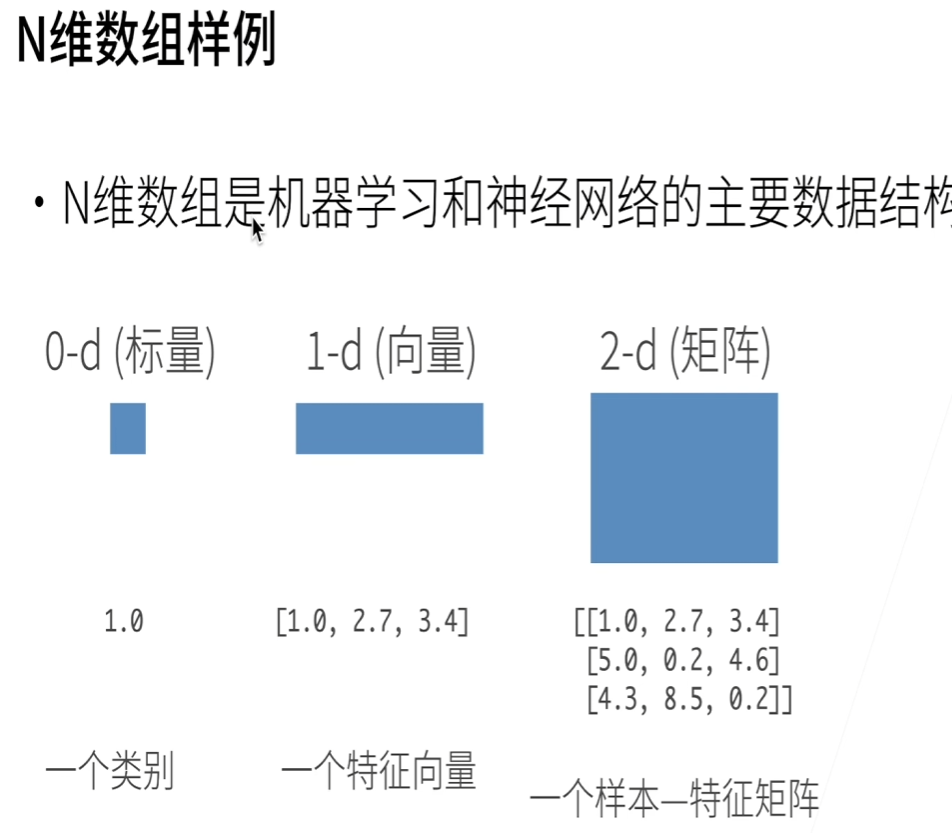

每一行表示一个样本，每一列表示一个特征

高维

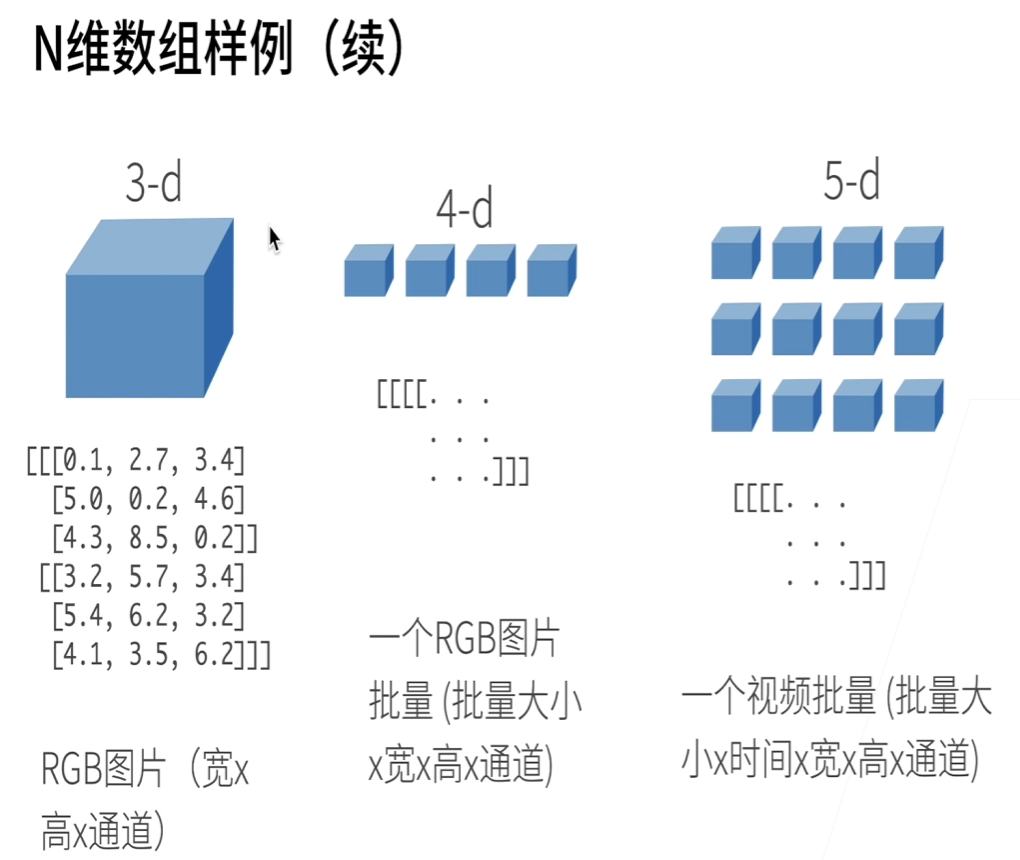

宽：列

高：行

四维就是n个三维：128张图片


创建数组

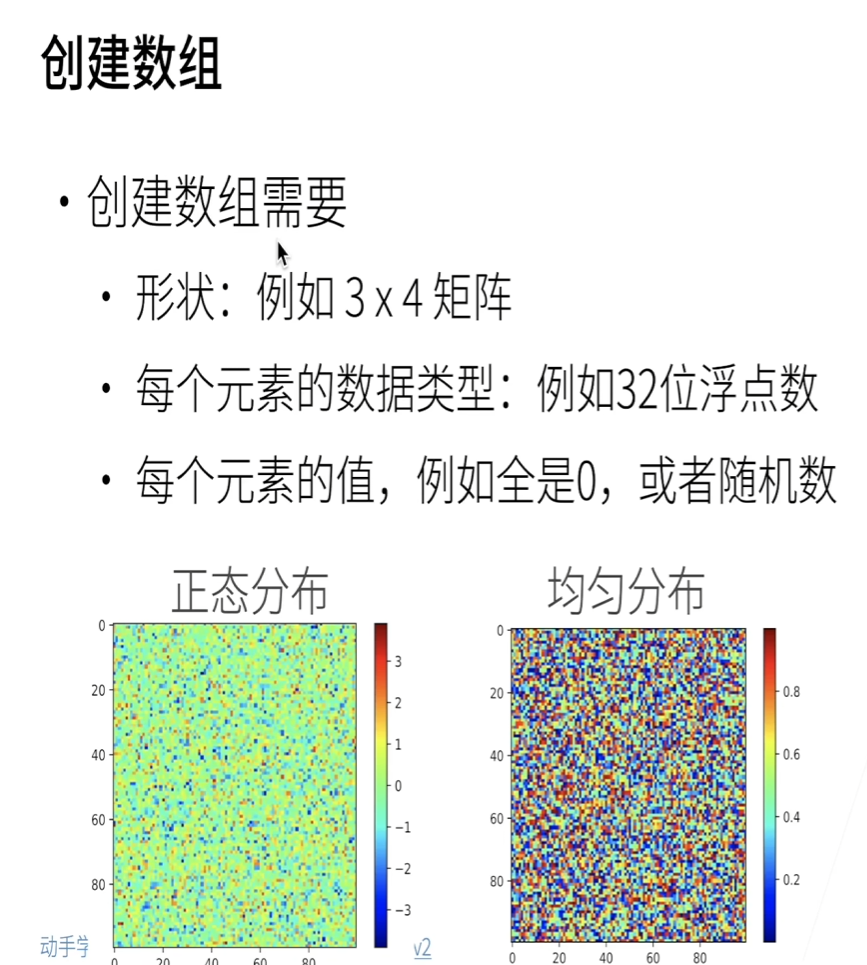

访问元素

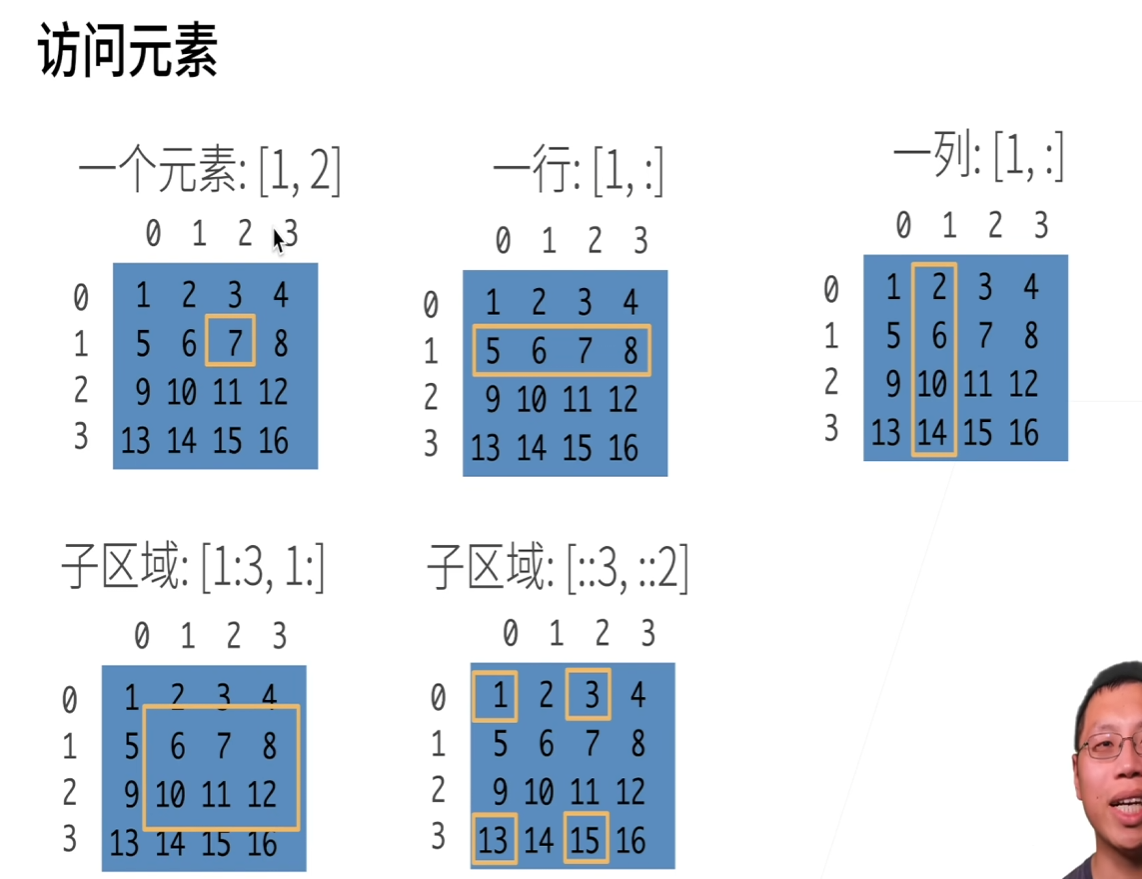

In [2]:
import torch

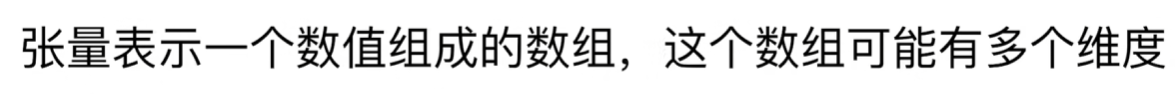

In [3]:
x=torch.arange(12)

x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [6]:
x.shape#一维

torch.Size([12])

In [7]:
x.numel()#元素总数

12

In [ ]:
x1=x.reshape(3,4)#改为三行四列
x1

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [9]:
#全0
x2=torch.zeros((2,3))
x2


tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [10]:
#全1
x3=torch.ones((2,3,4))
x3


tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [13]:
#列表赋值
torch.tensor([[[1,23,3],[2,31,1],[4,5,6]]])

tensor([[[ 1, 23,  3],
         [ 2, 31,  1],
         [ 4,  5,  6]]])

In [15]:
torch.tensor([[[1,23,3],[2,31,1],[4,5,6]]]).shape

torch.Size([1, 3, 3])

In [16]:
#运算
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x**y  # **运算符是求幂运算

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [17]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [19]:
X = torch.arange(12, dtype=torch.float32).reshape((3, 4))
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [21]:
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
Y

tensor([[2., 1., 4., 3.],
        [1., 2., 3., 4.],
        [4., 3., 2., 1.]])

In [23]:
# 按行拼接
cat_dim0 = torch.cat((X, Y), dim=0)
cat_dim0

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])

In [24]:
# 按列拼接
cat_dim1 = torch.cat((X, Y), dim=1)
cat_dim1


tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])

In [25]:
X==Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [27]:
X.sum()#所有元素求和
X.sum(axis=0)#按列求和
X.sum(axis=1)#按行求和

tensor([ 6., 22., 38.])

In [28]:
a=torch.arange(3).reshape(3,1)
a

tensor([[0],
        [1],
        [2]])

In [29]:
b=torch.arange(2).reshape(1,2)
b

tensor([[0, 1]])

In [30]:
a+b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

广播机制：
    当两个数组的维度不同时，将维度较小的数组在缺失的维度上进行扩展，直到两个数组的维度相同。
    扩展的方式是将缺失的维度复制多份，使得两个数组的维度相同。
    广播机制只在扩展维度上进行操作，而在其他维度上的元素必须相同。

In [32]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [31]:
X[-1]

tensor([ 8.,  9., 10., 11.])

In [35]:
X[1:3,:]#【1，3）行    取所有列

tensor([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
#修改值
X[1,2]=9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
#区域赋值
X[0:2,:]=12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

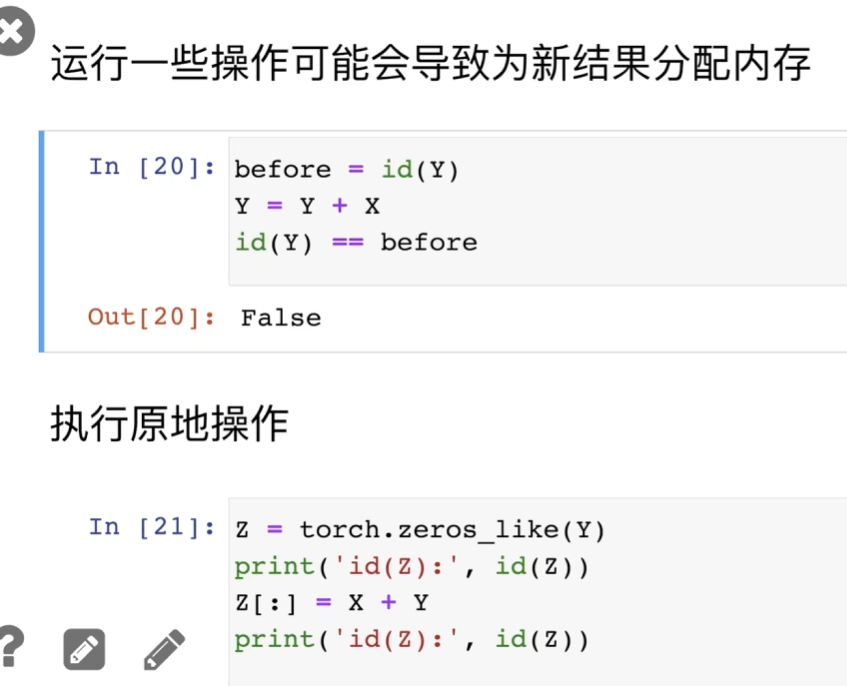

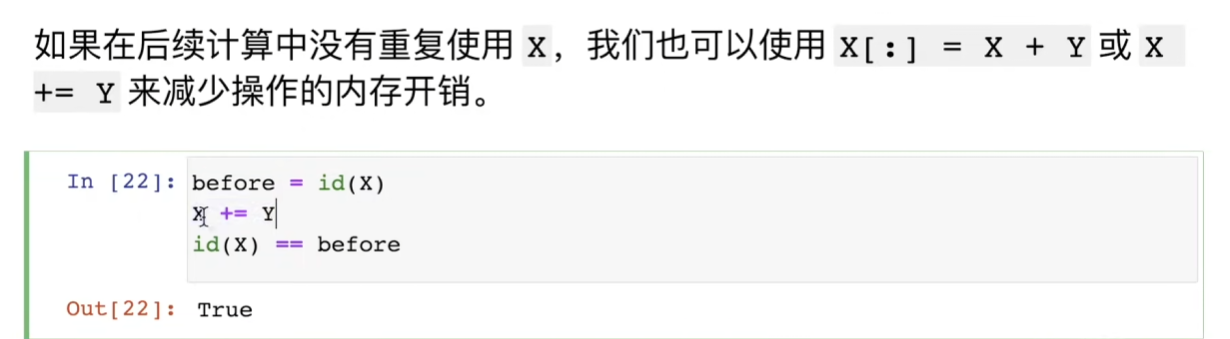

In [38]:
import numpy as np
#转换为numpy标量
a=X.numpy()
a


array([[12., 12., 12., 12.],
       [12., 12., 12., 12.],
       [ 8.,  9., 10., 11.]], dtype=float32)

In [39]:
b=torch.tensor(a)
b

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [ ]:
#转换为py标量

c=torch.tensor([2])
c,c.item()


(tensor([2]), 2)

In [41]:
int(c)

2

数据预处理

In [2]:
import os

os.makedirs(os.path.join('E:\\深度学习\\李沐动手学', 'data'), exist_ok=True)
data_file = os.path.join('E:\\深度学习\\李沐动手学', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 每行表示一个数据样本
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [3]:
import pandas as pd

data=pd.read_csv(data_file)

print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [ ]:
#插值
inputs,outputs= data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)


   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


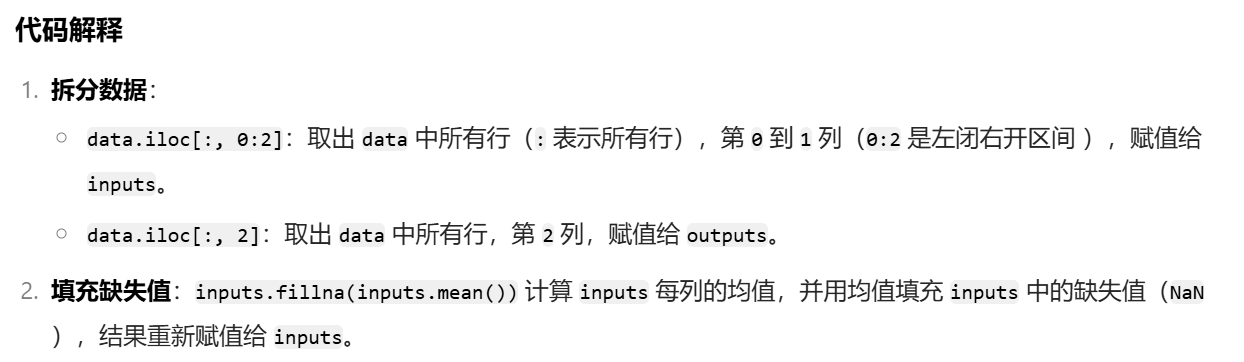

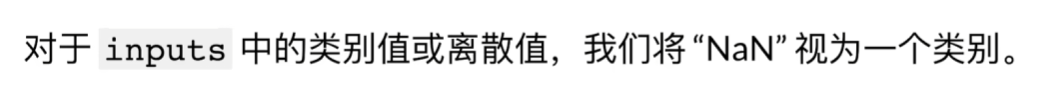

In [7]:
inputs=pd.get_dummies(inputs,dummy_na=True)
inputs

,NumRooms,Alley_Pave,Alley_nan
0,3.0,1,0
1,2.0,0,1
2,4.0,0,1
3,3.0,0,1


In [8]:
import torch

x,y=torch.tensor(inputs.values),torch.tensor(outputs.values)
x,y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))